<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-handbook/blob/master/deep-learning/Convolutional_Neural_Networks.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>


# Convolutional Neural Networks (aka CNN or convnets)

## Package setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import to_categorical

# Display plots inline, change default figure size and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
# Set Seaborn aesthetic parameters to defaults
sns.set()

/Users/baptiste/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Utility functions

In [2]:
def plot_loss_acc(history):
    """Plot training and (optionally) validation loss and accuracy"""

    loss = history.history['loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 10))

    plt.subplot(2, 1, 1)
    plt.plot(epochs, loss, '.--', label='Training loss')
    final_loss = loss[-1]
    title = 'Training loss: {:.4f}'.format(final_loss)
    plt.ylabel('Loss')
    if 'val_loss' in history.history:
        val_loss = history.history['val_loss']
        plt.plot(epochs, val_loss, 'o-', label='Validation loss')
        final_val_loss = val_loss[-1]
        title += ', Validation loss: {:.4f}'.format(final_val_loss)
    plt.title(title)
    plt.legend()

    acc = history.history['acc']

    plt.subplot(2, 1, 2)
    plt.plot(epochs, acc, '.--', label='Training acc')
    final_acc = acc[-1]
    title = 'Training accuracy: {:.2f}%'.format(final_acc * 100)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    if 'val_acc' in history.history:
        val_acc = history.history['val_acc']
        plt.plot(epochs, val_acc, 'o-', label='Validation acc')
        final_val_acc = val_acc[-1]
        title += ', Validation accuracy: {:.2f}%'.format(final_val_acc * 100)
    plt.title(title)
    plt.legend()

## Convnets for images

In [3]:
# Load the Keras MNIST digits dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f'Training images: {train_images.shape}. Training labels: {train_labels.shape}')

Training images: (60000, 28, 28). Training labels: (60000,)


In [4]:
# Reshape train and test data
x_train = train_images.reshape((60000, 28, 28, 1))
x_train = x_train.astype('float32') / 255

x_test = test_images.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32') / 255

# One-hot encoding of expected results
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

print(f'x_train: {x_train.shape}. y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}. y_test: {y_test.shape}')

x_train: (60000, 28, 28, 1). y_train: (60000, 10)
x_test: (10000, 28, 28, 1). y_test: (10000, 10)


In [5]:
# Create a Convnet
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add dense classifier on top of it
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

Epoch 1/5
60000/60000 [==============================] - 68s 1ms/step - loss: 0.1745 - acc: 0.9453
Epoch 2/5
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0472 - acc: 0.9857
Epoch 3/5
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0336 - acc: 0.9898
Epoch 4/5
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0253 - acc: 0.9922
Epoch 5/5
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0200 - acc: 0.9940


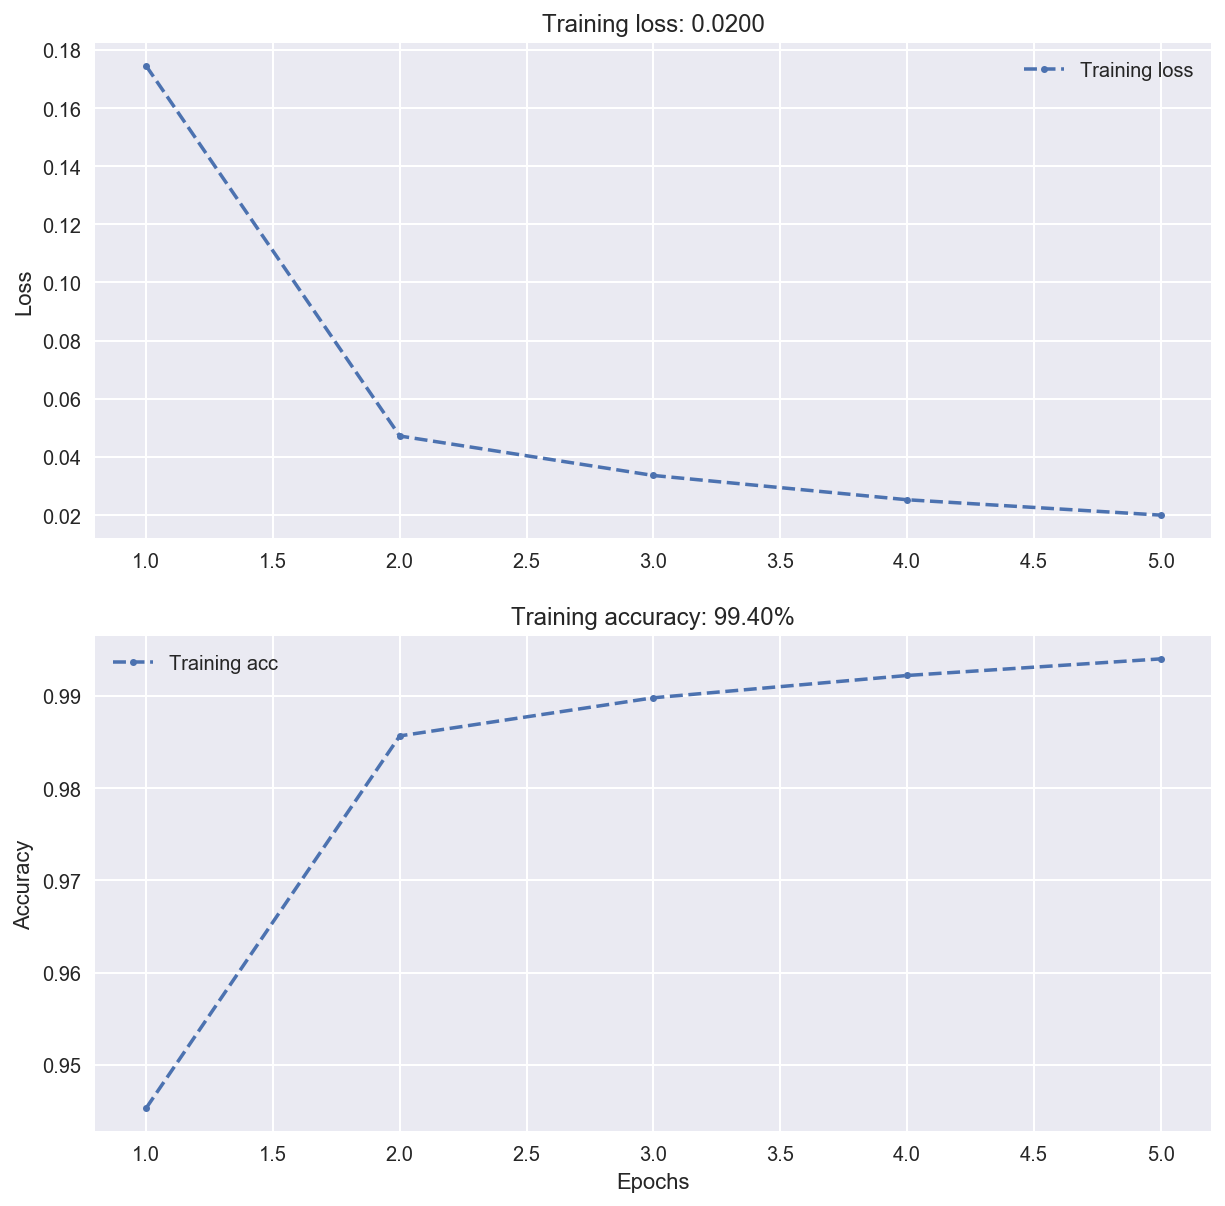

In [6]:
# Train the convnet
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=64)
plot_loss_acc(history)

In [7]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f'Test accuracy: {test_acc * 100}%')

Test accuracy: 99.22999999999999%


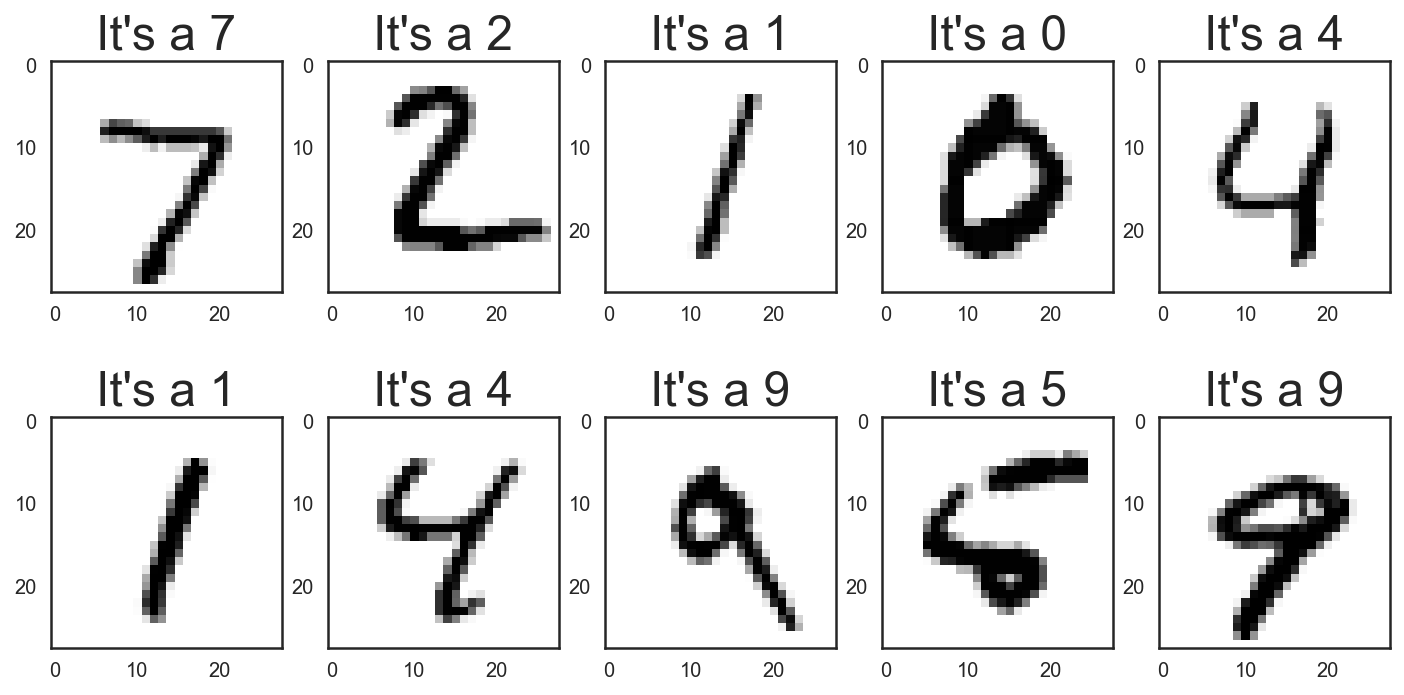

In [44]:
# Plot the first 10 digits with associated predictions

# Temporary hide Seaborn grid lines
with sns.axes_style('white'):
    plt.figure(figsize=(12, 6))
    for i in range(10):
        digit = test_images[i]
        # Reshape image into a 4D tensor of dimensions (1, 28, 28, 1)
        input = digit.reshape(28, 28, 1)[np.newaxis, :]
        prediction = np.argmax(model.predict(input))
        fig = plt.subplot(2, 5, i + 1)
        plt.title('It\'s a {:d}'.format(prediction), fontsize=24)
        plt.imshow(digit, cmap=plt.cm.binary)

## Visualizing convnet filters

Inspired by this [Keras blog article](https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html).

In [8]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict.keys())

dict_keys(['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'flatten_1', 'dense_1', 'dense_2'])


In [22]:
from keras.models import load_model
from keras import backend as K

# Set the matplotlib figure size
plt.rc('figure', figsize = (12.0, 12.0))

# Set the learning phase to false, the model is pre-trained.
K.set_learning_phase(False)

# A placeholder for the input images
input_img = model.input

# Dimensions of the images
img_width = 28
img_height = 28

# A constant size step function for gradient ascent
def constant_step(total_steps, step, step_size = 1):
    return step_size

# Define an initial divisor and decay rate for a varied step function
# This function works better than constant step for the output layer
init_step_divisor = 100
decay = 10

def vary_step(total_steps, step):
    return (1.0 / (init_step_divisor + decay * step))

In [12]:
# Function from the Keras blog that normalizes and scales
# a filter before it is rendered as an image
def normalize_image(x):
    # Normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + K.epsilon())
    x *= 0.1

    # Clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # Convert to grayscale image array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

# Create a numpy array that represents the image of a filter
# in the passed layer output and loss functions. Based on the
# core parts of Francois Chollet's blog post.
def visualize_filter(layer_output, loss, steps = 256, step_fn = constant_step, input_initialization = 'random'):
    # Compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_img)[0]

    # Normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # This function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])

    if K.image_data_format() == 'channels_first':
        input_shape = (1, img_width, img_height)
    else:
        input_shape = (img_width, img_height, 1)

    # Initialize the input image. Random works well for the conv layers,
    # zeros works better for the output layer.
    input_img_data = np.random.random(input_shape) * 255.
    if input_initialization == "zeros":
        input_img_data = np.zeros(input_shape)
    input_img_data = np.array(input_img_data).reshape(1, 28, 28, 1)

    # Run gradient ascent for the specified number of steps
    for i in range(steps):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step_fn(steps, i)

    final_img = input_img_data[0]

    return final_img

# Define a function that stitches the 28 * 28 numpy arrays
# together into a collage of filters for each layer.
def stitch_filters(layer_filters, y_img_count, x_img_count):
    margin = 2
    width = y_img_count * img_width + (y_img_count - 1) * margin
    height = x_img_count * img_height + (x_img_count - 1) * margin
    stitched_filters = np.zeros((width, height))

    # Fill the picture with our saved filters
    for i in range(y_img_count):
        for j in range(x_img_count):
            img = layer_filters[i * x_img_count + j]
            stitched_filters[(img_width + margin) * i: (img_width + margin) * i + img_width,
                             (img_height + margin) * j: (img_height + margin) * j + img_height] = img

    return stitched_filters

In [49]:
# Start by visualizing the first convolutional layer
layer_name = 'conv2d_1'
layer_filters = []

# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

# For each filter in this layer
for i in range(32):
    layer_output = layer_dict[layer_name].output
    img = deprocess_image(layer_output)
    layer_filters.append(img.reshape(28,28))

layer_filters = [normalize_image(image) for image in layer_filters]      
layer_image = stitch_filters(layer_filters, 4, 8)

# Temporary hide Seaborn grid lines
with sns.axes_style('white'):
    plt.imshow(layer_image, cmap = 'gray')
    plt.show()

AttributeError: 'Tensor' object has no attribute 'mean'

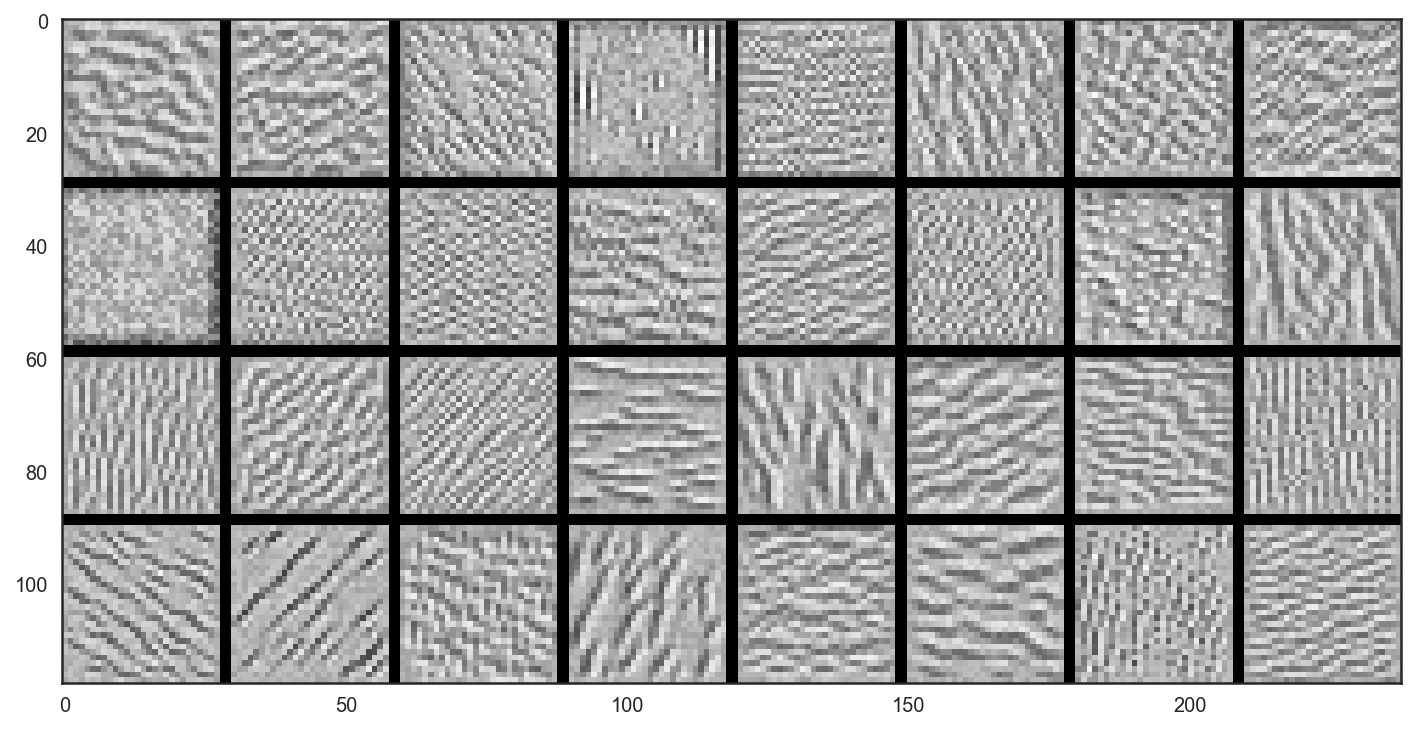

In [23]:
# Start by visualizing the first convolutional layer
layer_name = 'conv2d_1'
layer_filters = []

# For each filter in this layer
for i in range(32):
    layer_output = layer_dict[layer_name].output
    loss = K.mean(layer_output[:, :, :, i])
    img = visualize_filter(layer_output, loss)
    layer_filters.append(img.reshape(28,28))

layer_filters = [normalize_image(image) for image in layer_filters]      
layer_image = stitch_filters(layer_filters, 4, 8)

# Temporary hide Seaborn grid lines
with sns.axes_style('white'):
    plt.imshow(layer_image, cmap = 'gray')
    plt.show()

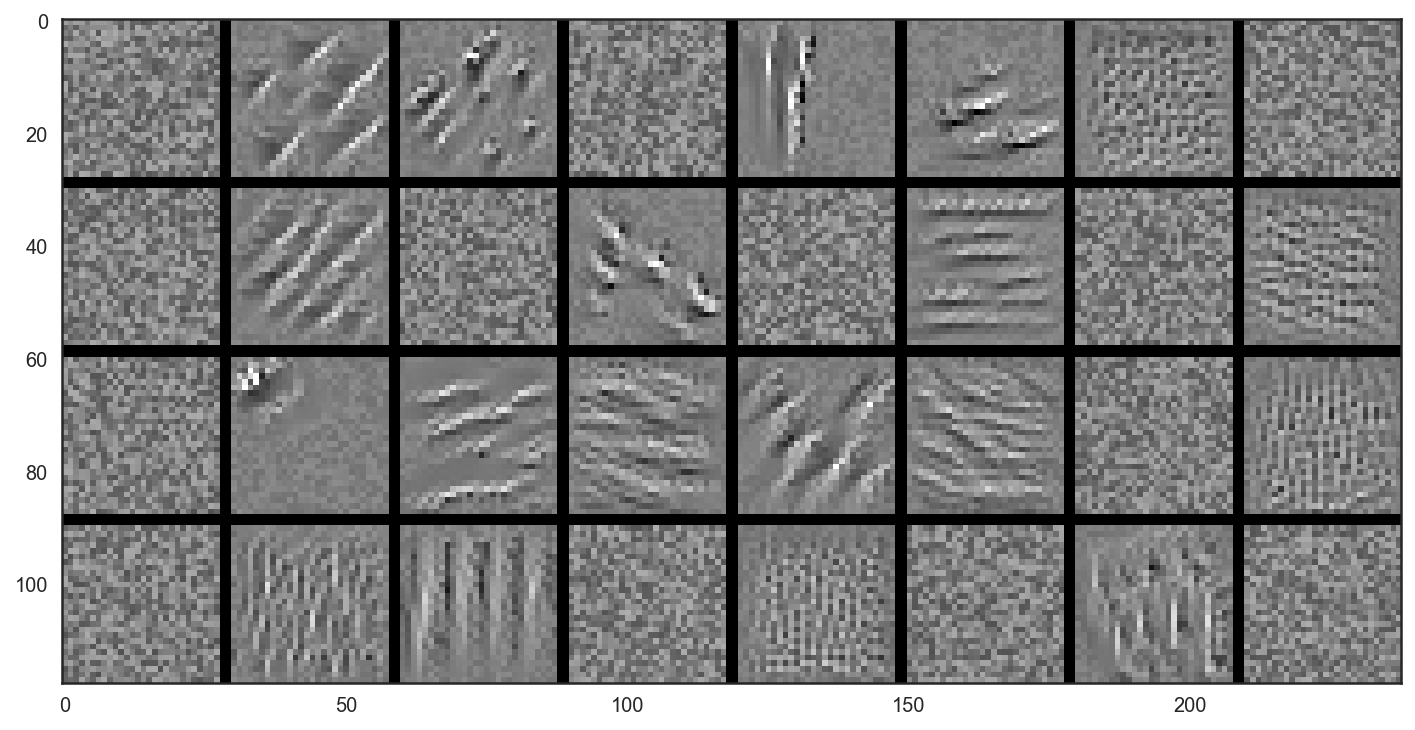

In [24]:
# The second convolutional layer
layer_name = 'conv2d_2'
layer_filters = []

# For each filter in this layer
for i in range(32):
    layer_output = layer_dict[layer_name].output
    loss = K.mean(layer_output[:, :, :, i])
    img = visualize_filter(layer_output, loss)
    layer_filters.append(img.reshape(28,28))

layer_filters = [normalize_image(image) for image in layer_filters]
layer_image = stitch_filters(layer_filters, 4, 8)

# Temporary hide Seaborn grid lines
with sns.axes_style('white'):
    plt.imshow(layer_image, cmap = 'gray')
    plt.show()

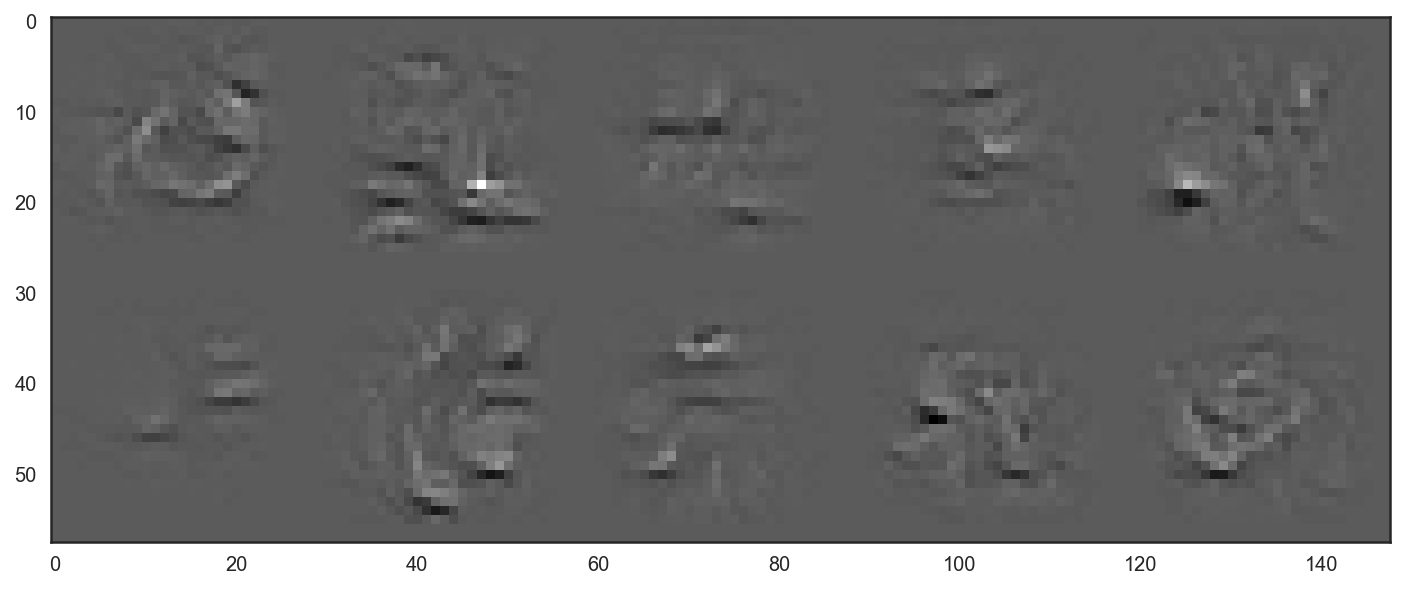

In [25]:
# The final output layer of the model
output_filters = []

for i in range(10):
    output = model.output
    loss = K.mean(output[:, i])
    img = visualize_filter(output, loss,
                          steps = 4096,
                          step_fn = vary_step,
                          input_initialization = 'zeros')
    output_filters.append(img.reshape(28,28))

output_image_raw = stitch_filters(output_filters, 2, 5)

# Temporary hide Seaborn grid lines
with sns.axes_style('white'):
    plt.imshow(output_image_raw, cmap = 'gray')
    plt.show()

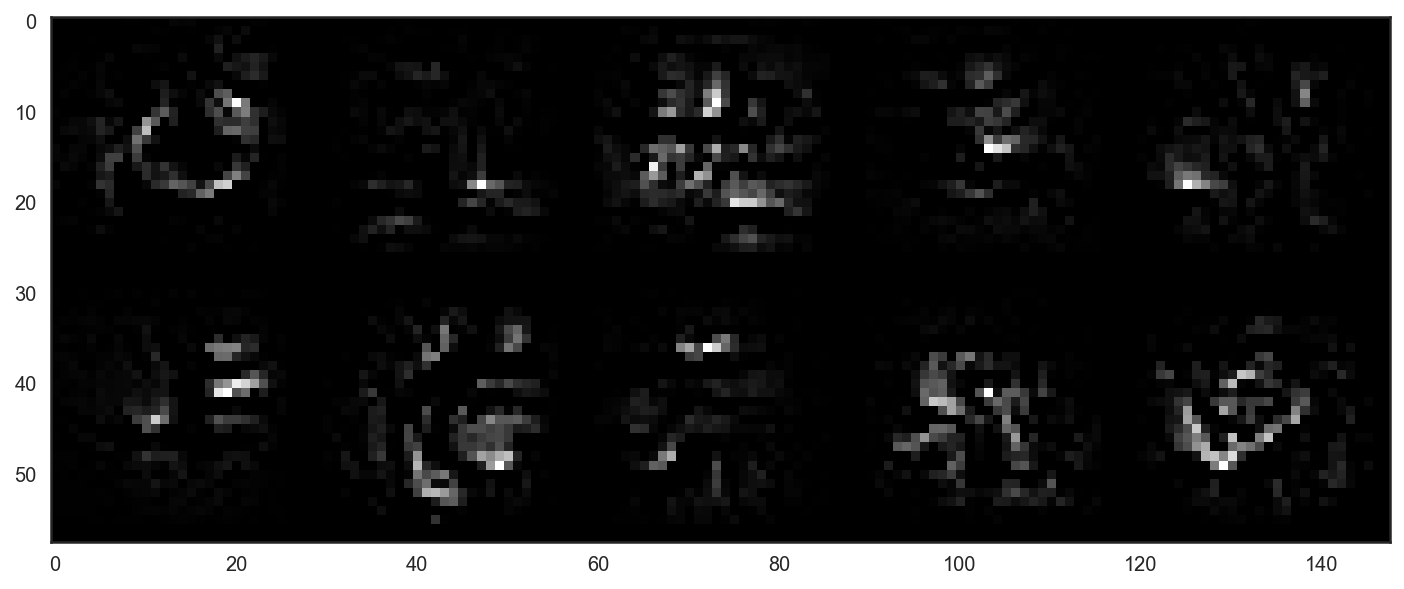

In [26]:
# The above output filters are very grey, which isn't the way the
# original MNIST digits are represented.
def deaverage_digit(digit):
    deaveraged_digit = np.clip(digit - digit.mean(), 0, 255)
    deaveraged_digit *= (255.0/deaveraged_digit.max())
    return deaveraged_digit

deaveraged_outputs = [deaverage_digit(x) for x in output_filters]
output_image_deaveraged = stitch_filters(deaveraged_outputs, 2, 5)

# Temporary hide Seaborn grid lines
with sns.axes_style('white'):
    plt.imshow(output_image_deaveraged, cmap = 'gray')
    plt.show()